# Capital Asset Pricing Model (CAPM) 

#### Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk, and expected return for assets or stocks. CAPM is used with modern portfolio theory (MPT) to understand portfolio risk and expected return.  

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# yahoo finance data
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
risk_free = '^IRX'
market = '^GSPC'
start = '2016-01-01'
end = '2023-01-01'

df = yf.download(symbol, start=start, end=end)['Adj Close']
R_F = yf.download(risk_free, start=start, end=end)['Adj Close']
M = yf.download(market, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Date
2016-01-04 00:00:00-05:00    2.77
2016-01-05 00:00:00-05:00    2.75
2016-01-06 00:00:00-05:00    2.51
2016-01-07 00:00:00-05:00    2.28
2016-01-08 00:00:00-05:00    2.14
Name: Adj Close, dtype: float64

In [4]:
df.tail()

Date
2022-12-23 00:00:00-05:00    64.519997
2022-12-27 00:00:00-05:00    63.270000
2022-12-28 00:00:00-05:00    62.570000
2022-12-29 00:00:00-05:00    64.820000
2022-12-30 00:00:00-05:00    64.769997
Name: Adj Close, dtype: float64

In [5]:
df.index = pd.Index(df.index.date, name="Date")
df.head()

Date
2016-01-04    2.77
2016-01-05    2.75
2016-01-06    2.51
2016-01-07    2.28
2016-01-08    2.14
Name: Adj Close, dtype: float64

In [6]:
M.index = pd.Index(M.index.date, name="Date")
M.head()

Date
2016-01-04    2012.660034
2016-01-05    2016.709961
2016-01-06    1990.260010
2016-01-07    1943.089966
2016-01-08    1922.030029
Name: Adj Close, dtype: float64

In [7]:
R_F.index = pd.Index(R_F.index.date, name="Date")
R_F.head()

Date
2016-01-04    0.155
2016-01-05    0.205
2016-01-06    0.205
2016-01-07    0.190
2016-01-08    0.190
Name: Adj Close, dtype: float64

In [8]:
normalize_df = (df - df.min())/ (df.max() - df.min())
normalize_df

Date
2016-01-04    0.006058
2016-01-05    0.005933
2016-01-06    0.004434
2016-01-07    0.002998
2016-01-08    0.002124
                ...   
2022-12-23    0.391731
2022-12-27    0.383924
2022-12-28    0.379552
2022-12-29    0.393604
2022-12-30    0.393292
Name: Adj Close, Length: 1762, dtype: float64

No handles with labels found to put in legend.


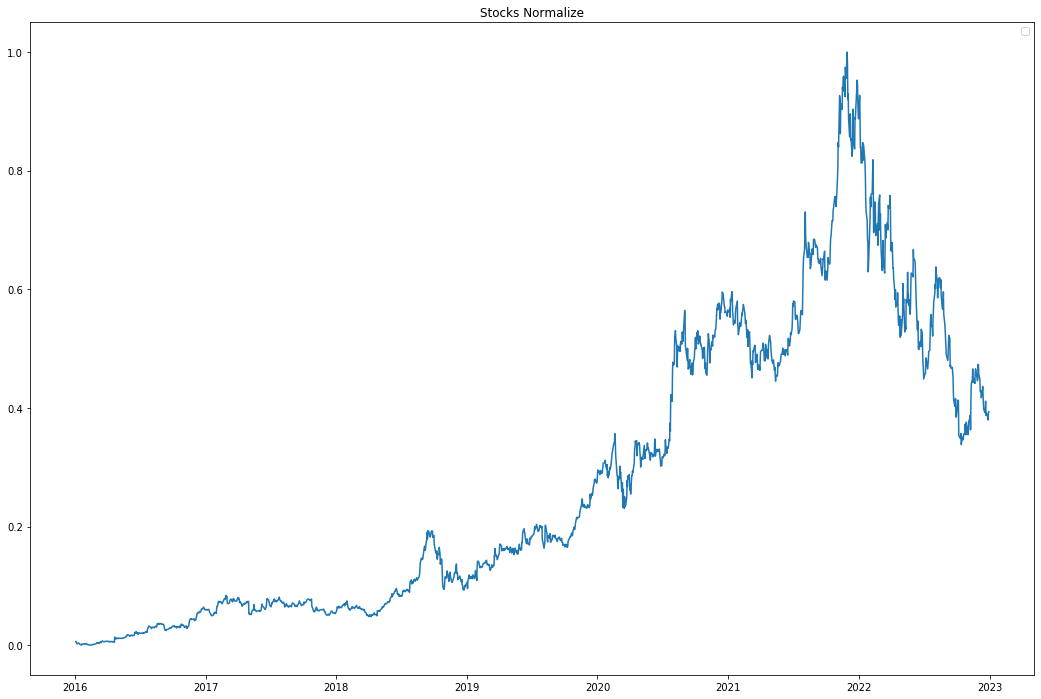

In [9]:
plt.figure(figsize=(18,12))
plt.plot(normalize_df)
plt.title('Stocks Normalize')
plt.legend(loc=True)

In [10]:
rets = df.pct_change().dropna()
rets.head()

Date
2016-01-05   -0.007220
2016-01-06   -0.087273
2016-01-07   -0.091633
2016-01-08   -0.061403
2016-01-11    0.093458
Name: Adj Close, dtype: float64

In [11]:
rets = pd.DataFrame(rets)
rets

,Adj Close
Date,
2016-01-05,-0.007220
2016-01-06,-0.087273
2016-01-07,-0.091633
2016-01-08,-0.061403
2016-01-11,0.093458
...,...
2022-12-23,0.010335
2022-12-27,-0.019374
2022-12-28,-0.011064


In [12]:
rets.rename(columns = {"Adj Close":symbol}, inplace=True)

Text(0.5, 1.0, 'AMD Daily returns')

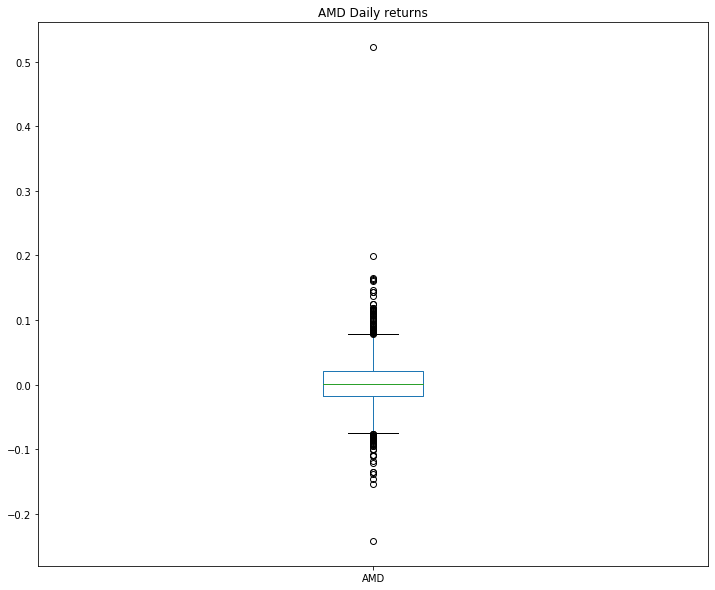

In [13]:
rets.boxplot(figsize=(12, 10), grid=False)
plt.title(symbol + " Daily returns")

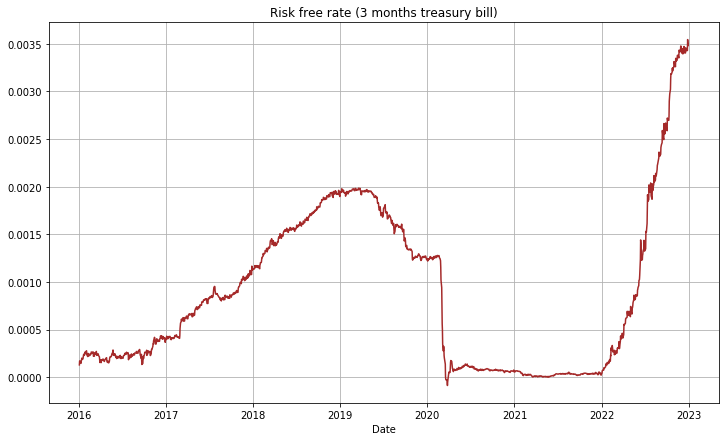

In [14]:
rf = (1+(R_F/100))**(1/12)-1

rf.plot(title="Risk free rate (3 months treasury bill)"
, figsize=(12,7),grid = True,color="brown")



In [15]:
data = pd.DataFrame({'Stock':df, 'Market':M})
data.tail()
  

,Stock,Market
Date,,
2022-12-23,64.519997,3844.820068
2022-12-27,63.270000,3829.250000
2022-12-28,62.570000,3783.219971
2022-12-29,64.820000,3849.280029
2022-12-30,64.769997,3839.500000


In [16]:
data[['Stock_Ret','Market_Ret']] = np.log(data[['Stock','Market']]/data[['Stock','Market']].shift(1))
data.dropna(inplace=True)
data.head()

,Stock,Market,Stock_Ret,Market_Ret
Date,,,,
2016-01-05,2.75,2016.709961,-0.007246,0.002010
2016-01-06,2.51,1990.260010,-0.091318,-0.013202
2016-01-07,2.28,1943.089966,-0.096107,-0.023986
2016-01-08,2.14,1922.030029,-0.063370,-0.010898
2016-01-11,2.34,1923.670044,0.089345,0.000853


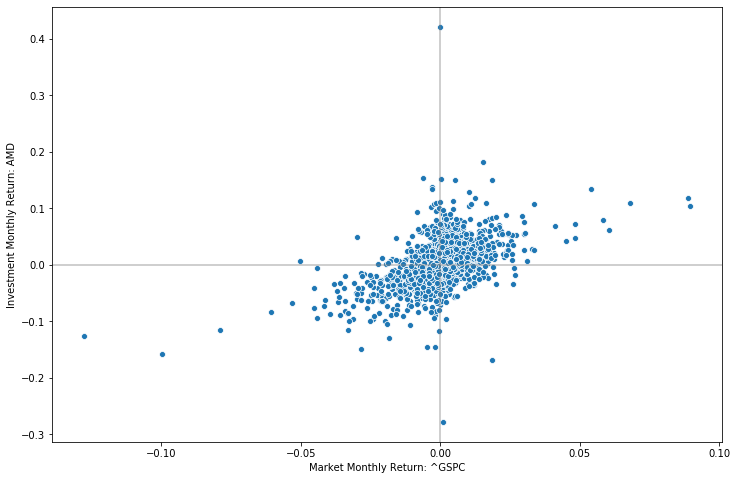

In [17]:
plt.figure(figsize = (12,8))

plt.axvline(0, color='grey', alpha = 0.5)
plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Stock_Ret', x = 'Market_Ret', data = data)
plt.xlabel('Market Monthly Return: {}'.format(market))
plt.ylabel('Investment Monthly Return: {}'.format(symbol))
plt.show()

In [18]:
beta  = (data[['Stock_Ret','Market_Ret']].cov()/data['Market_Ret'].var()).iloc[0].iloc[1]
print('Beta from CAPM formula: ', beta.round(4))



Beta from CAPM formula:  1.6337


In [19]:
beta_reg, alpha = np.polyfit(x = data['Market_Ret'] , y = data['Stock_Ret'] ,deg = 1)
print('Beta from Linear Regression: ',beta_reg.round(4))
print('Alpha: ', alpha.round(3))


Beta from Linear Regression:  1.6337
Alpha:  0.001


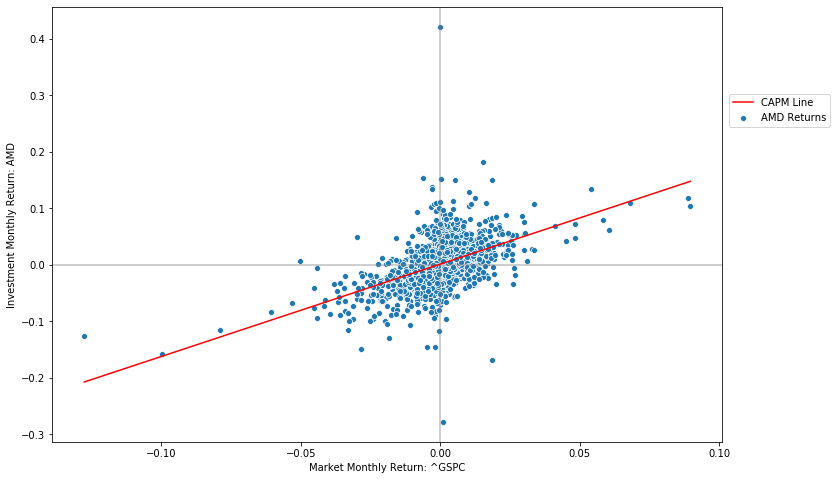

In [20]:
plt.figure(figsize = (12,8))

plt.axvline(0, color='grey', alpha = 0.5)
plt.axhline(0, color='grey', alpha = 0.5)

sns.scatterplot(y = 'Stock_Ret', x = 'Market_Ret', data = data, label = symbol + ' Returns')
sns.lineplot(x = data['Market_Ret'], y = alpha + data['Market_Ret']*beta_reg, color = 'red', label = 'CAPM Line')

plt.xlabel('Market Monthly Return: {}'.format(market))
plt.ylabel('Investment Monthly Return: {}'.format(symbol))
plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)

plt.show()

In [21]:
expected_return = R_F[-1] + beta*(data['Market_Ret'][-1] - R_F[-1])
expected_return_display = str(round(expected_return, 2))
print("Expected Return of " + symbol + ': ' + expected_return_display +'%')

Expected Return of AMD: -2.7%
